In [13]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  2 03:32:51 2018

@author: ks
"""

# setup the matplotlib graphics library and configure it to show figures inline in the notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
np.set_printoptions(threshold=np.inf)

# make qutip available in the rest of the notebook
from qutip import *

In [14]:
#def compute(w1list, w2, w3, g12, g13):
def compute(waq_list, wc, wq, g, gac, N, M):
    # Pre-compute operators for the hamiltonian
#    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
#    sx1 = tensor(sigmax(), qeye(2), qeye(2))

#    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
#    sx2 = tensor(qeye(2), sigmax(), qeye(2))

#    sz3 = tensor(qeye(2), qeye(2), sigmaz())
#    sx3 = tensor(qeye(2), qeye(2), sigmax())

    a   = tensor(destroy(N), qeye(2), qeye(2)) # destroy of cavity
    sm  = tensor(qeye(N), destroy(2), qeye(2)) # destroy of qubit
    sam = tensor(qeye(N), qeye(2), destroy(2)) # destroy of ancilla

    nq  = tensor(qeye(N), sigmaz(), qeye(2)) # number of qubit
    #nq  = tensor(qeye(N), destroy(2).dag() * destroy(2), qeye(2)) # number of qubit
    nc  = tensor(destroy(N).dag() * destroy(N), qeye(2), qeye(2)) # number of cavity
    naq  = tensor(qeye(N), qeye(2), sigmaz()) # number of ancilla
    #naq = tensor(qeye(N), qeye(2), destroy(2).dag() * destroy(2)) # number of qubit

    idx = 0
    evals_mat = np.zeros((len(waq_list),N*2*2))
    for waq in waq_list:

        # evaluate the Hamiltonian
        # H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3
        # H = waq * naq + wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() + a) * (sam + sam.dag())
        H = 0.5 * (waq-M) * naq + 0.5 * wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() + a) * (sam + sam.dag())
        # H = 0.5 * (waq-M) * naq + 0.5 * wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() * sam + a * sam.dag())
       
        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

#        print(len(evals))
        evals_mat[idx,:] = np.real(evals)
    
        idx += 1
    return evals_mat, ekets

In [15]:
wc  = 0.8 * 2 * np.pi   # cavity frequency
wq  = 1.0 * 2 * np.pi   # qubit frequency
g   = 0.6 * 2 * np.pi   # cavity-qubit coupling strength
gac = 0.02 * 2 * np.pi  # ancilla-cavity coupling strength
N   = 20
M   = 0 * 2 * np.pi

waq_list = np.linspace(0, 2, 100) * 2.0 * np.pi # ancilla frequency range

evals_mat, ekets = compute(waq_list, wc, wq, g, gac, N, M)

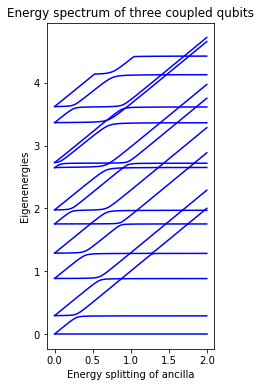

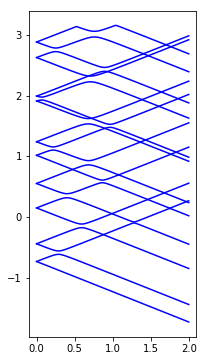

In [16]:
fig, ax = plt.subplots(figsize=(3,6))
fig, bx = plt.subplots(figsize=(3,6))
snum = 20

for n in range(snum):
    ax.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n] - evals_mat[:, 0]) / (2*np.pi), 'b')
    #ax.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n]) / (2*np.pi), 'b')

for n in range(snum):
    #ax.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n] - evals_mat[:, 0]) / (2*np.pi), 'b')
    bx.plot((waq_list - M) / (2*np.pi), (evals_mat[:,n]) / (2*np.pi), 'b')
    
ax.set_xlabel('Energy splitting of ancilla')
ax.set_ylabel('Eigenenergies')
ax.set_title( 'Energy spectrum of three coupled qubits');

In [17]:
parity_op = -tensor(((0+np.pi*1j)*destroy(N).dag() * destroy(N)).expm(), sigmaz(), sigmaz())
zero = tensor(basis(N, 0) - basis(N, 0), basis(2,0) - basis(2,0))

In [46]:
wc  = 0.8 * 2 * np.pi   # cavity frequency
wq  = 1.0 * 2 * np.pi   # qubit frequency
g   = 1.0 * 2 * np.pi   # cavity-qubit coupling strength
gac = 0.02 * 2 * np.pi  # ancilla-cavity coupling strength
N   = 10
M   = 0 * 2 * np.pi
waq = 1e-03

a   = tensor(destroy(N), qeye(2), qeye(2)) # destroy of cavity
sm  = tensor(qeye(N), destroy(2), qeye(2)) # destroy of qubit
sam = tensor(qeye(N), qeye(2), destroy(2)) # destroy of ancilla

nq  = tensor(qeye(N), sigmaz(), qeye(2)) # number of qubit
    #nq  = tensor(qeye(N), destroy(2).dag() * destroy(2), qeye(2)) # number of qubit
nc  = tensor(destroy(N).dag() * destroy(N), qeye(2), qeye(2)) # number of cavity
naq  = tensor(qeye(N), qeye(2), sigmaz()) # number of ancilla

H = 0.5 * (waq-M) * naq + 0.5 * wq * nq + wc * nc + g * (a.dag() + a) * (sm + sm.dag()) + gac * (a.dag() + a) * (sam + sam.dag())

evals, ekets = H.eigenstates()

parity_op = -tensor(((0+np.pi*1j)*destroy(N).dag() * destroy(N)).expm(), sigmaz(), sigmaz())
zero_parity_op = -tensor(((0+np.pi*1j)*destroy(N).dag() * destroy(N)).expm(), sigmaz(), qeye(2))
    # total parity_oprator
zero = tensor(basis(N, 0) - basis(N, 0), basis(2,0) - basis(2,0), basis(2, 0) - basis(2, 0))

parity_op*ekets[0]

Quantum object: dims = [[10, 2, 2], [1, 1, 1]], shape = (40, 1), type = ket
Qobj data =
[[-0.18472306]
 [ 0.        ]
 [ 0.        ]
 [-0.49150252]
 [ 0.        ]
 [ 0.41875777]
 [ 0.33628823]
 [ 0.        ]
 [-0.24986929]
 [ 0.        ]
 [ 0.        ]
 [-0.43417032]
 [ 0.        ]
 [ 0.266397  ]
 [ 0.21324473]
 [ 0.        ]
 [-0.1205894 ]
 [ 0.        ]
 [ 0.        ]
 [-0.1854399 ]
 [ 0.        ]
 [ 0.09356793]
 [ 0.07582802]
 [ 0.        ]
 [-0.03612478]
 [ 0.        ]
 [ 0.        ]
 [-0.05185593]
 [ 0.        ]
 [ 0.02264195]
 [ 0.01862608]
 [ 0.        ]
 [-0.00760923]
 [ 0.        ]
 [ 0.        ]
 [-0.010429  ]
 [ 0.        ]
 [ 0.00350151]
 [ 0.00290775]
 [ 0.        ]]

In [47]:
parity_op*ekets[0] == -ekets[0]

True

In [44]:
print(parity_op*ekets[0])

Quantum object: dims = [[10, 2, 2], [1, 1, 1]], shape = (40, 1), type = ket
Qobj data =
[[ 1.84908663e-01]
 [-7.55878693e-12]
 [-2.00808814e-11]
 [ 4.91305737e-01]
 [ 1.71092029e-11]
 [-4.18600334e-01]
 [-3.36618540e-01]
 [ 1.37599853e-11]
 [ 2.50108347e-01]
 [-1.02235260e-11]
 [-1.77391719e-11]
 [ 4.34017063e-01]
 [ 1.08845044e-11]
 [-2.66307983e-01]
 [-2.13442780e-01]
 [ 8.72485292e-12]
 [ 1.20698555e-01]
 [-4.93376723e-12]
 [-7.57687365e-12]
 [ 1.85381734e-01]
 [ 3.82314365e-12]
 [-9.35401982e-02]
 [-7.58947225e-02]
 [ 3.10232897e-12]
 [ 3.61557740e-02]
 [-1.47792856e-12]
 [-2.11884706e-12]
 [ 5.18415278e-02]
 [ 0.00000000e+00]
 [-2.26360211e-02]
 [-1.86416461e-02]
 [ 0.00000000e+00]
 [ 7.61545212e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.04264321e-02]
 [ 0.00000000e+00]
 [-3.50068466e-03]
 [-2.91008105e-03]
 [ 0.00000000e+00]]


In [30]:
print(ekets[19] == parity_op*ekets[19])

True
